In [1]:
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from keras.layers import Dense, Convolution1D, MaxPooling1D, LSTM, MaxPool1D, Flatten, Dropout # importing dense layer
from keras.models import Sequential #importing Sequential layer
from keras.layers import Input
from keras.models import Model
from sklearn.model_selection import train_test_split 
import os
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [2]:
data = pd.read_csv('preprocess.csv')
data

Time  Status  Latitude  Longitude  Maximum Wind  Minimum Pressure  \
0         0       6      20.2      106.3            45              -999   
1       600       6      20.2      106.4            45              -999   
2      1200       6      20.2      106.7            45              -999   
3      1800       6      20.3      107.7            45              -999   
4         0       6      20.4      108.6            45              -999   
...     ...     ...       ...        ...           ...               ...   
26109  1200       4      21.7      109.0            35              1002   
26110  1800       4      22.4      108.7            30              1007   
26111     0       4      23.1      108.3            30              1008   
26112   600       4      23.5      107.9            25              1009   
26113  1200       4      24.2      107.7            20              1010   

       Low Wind NE  Low Wind SE  Low Wind SW  Low Wind NW  ...  \
0             -999         -999         -999         -999  ...   
1             -999         -999         -999         -999  ...   
2             -999         -999         -999         -999  ...   
3             -999         -999         -999         -999  ...   
4             -999         -999         -999         -999  ...   
...            ...          ...          ...          ...  ...   
26109           60            0            0            0  ...   
26110            0            0            0            0  ...   
26111            0            0            0            0  ...   
26112            0            0            0            0  ...   
26113            0            0            0            0  ...   

       Moderate Wind SE  Moderate Wind SW  Moderate Wind NW  High Wind NE  \
0                  -999              -999              -999          -999   
1                  -999              -999              -999          -999   
2                  -999              -999              -999          -999   
3                  -999              -999              -999          -999   
4                  -999              -999              -999          -999   
...                 ...               ...               ...           ...   
26109                 0                 0                 0             0   
26110                 0                 0                 0             0   
26111                 0                 0                 0             0   
26112                 0                 0                 0             0   
26113                 0                 0                 0             0   

       High Wind SE  High Wind SW  High Wind NW  Year  Month  Day  
0              -999          -999          -999  1949      6   11  
1              -999          -999          -999  1949      6   11  
2              -999          -999          -999  1949      6   11  
3              -999          -999          -999  1949      6   11  
4              -999          -999          -999  1949      6   12  
...             ...           ...           ...   ...    ...  ...  
26109             0             0             0  2015     11   28  
26110             0             0             0  2015     11   28  
26111             0             0             0  2015     11   29  
26112             0             0             0  2015     11   29  
26113             0             0             0  2015     11   29  

[26114 rows x 21 columns]

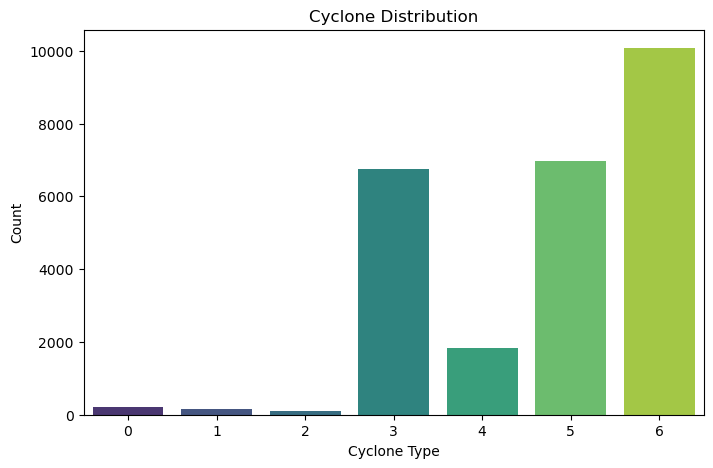

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
type_counts = data['Status'].value_counts()

# Create a bar plot
plt.figure(figsize=(8, 5))
sns.barplot(x=type_counts.index, y=type_counts.values, palette="viridis")
plt.title('Cyclone Distribution')
plt.xlabel('Cyclone Type')
plt.ylabel('Count')
plt.show()

In [4]:
train, test = train_test_split(data, test_size=0.2)
test.to_csv('Test.csv',  index=False)

In [5]:
target = data['Status']
data.drop(['Status'], axis=1, inplace=True)
print('Data shape', data.shape)

Data shape (26114, 20)


In [6]:
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder

X, y = np.array(data), np.array(target)
# label encode the target variable
y = LabelEncoder().fit_transform(y)
# transform the dataset
#oversample = SMOTE()
#X, y = oversample.fit_resample(X, y)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)


In [7]:
import joblib
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

In [8]:
from sklearn.preprocessing import LabelBinarizer
y_data = LabelBinarizer().fit_transform(y)

X_data=np.array(X)
y_data=np.array(y_data)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X_data,y_data, test_size=0.20, random_state=42)
print(X_train.shape,'\n',X_test.shape)

(20891, 20) 
 (5223, 20)


In [10]:
# reshape input to be [samples, time steps, features]
X_train = np.reshape(X_train, ( X_train.shape[0], X_train.shape[1],1 ))
X_test = np.reshape(X_test, ( X_test.shape[0], X_test.shape[1], 1))

In [11]:
X_train.shape

(20891, 20, 1)

In [12]:
model = Sequential() # initializing model
lstm_output_size = 16
model.add(Convolution1D(32,3,input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Convolution1D(32, 3,  activation="relu"))
model.add(MaxPooling1D(2))
model.add(Convolution1D(16, 3,  activation="relu"))
model.add(Convolution1D(16, 3,activation="relu"))
model.add(MaxPooling1D(2))
model.add(LSTM(lstm_output_size))
model.add(Dropout(0.1))
model.add(Dense(7, activation="softmax"))

C:\Users\saira\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [13]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                      │ (None, 18, 32)              │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_1 (Conv1D)                    │ (None, 16, 32)              │           3,104 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d (MaxPooling1D)         │ (None, 8, 32)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_2 (Conv1D)                    │ (None, 6, 16)               │           1,552 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_3 (Conv1D)                    │ (None, 4, 16)               │             784 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_1 (MaxPooling1D)       │ (None, 2, 16)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ (None, 16)                  │           2,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 7)                   │             119 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,799 (30.46 KB)

 Trainable params: 7,799 (30.46 KB)

 Non-trainable params: 0 (0.00 B)

In [14]:
history = model.fit(X_train, y_train, epochs=30, batch_size=16,validation_split=0.2)

Epoch 1/30
1045/1045 ━━━━━━━━━━━━━━━━━━━━ 22s 11ms/step - accuracy: 0.5120 - loss: 1.1467 - val_accuracy: 0.9033 - val_loss: 0.3394
Epoch 2/30
1045/1045 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - accuracy: 0.9127 - loss: 0.2992 - val_accuracy: 0.9340 - val_loss: 0.2054
Epoch 3/30
1045/1045 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - accuracy: 0.9363 - loss: 0.2081 - val_accuracy: 0.9459 - val_loss: 0.1764
Epoch 4/30
1045/1045 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - accuracy: 0.9447 - loss: 0.1760 - val_accuracy: 0.9442 - val_loss: 0.1490
Epoch 5/30
1045/1045 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - accuracy: 0.9448 - loss: 0.1737 - val_accuracy: 0.9572 - val_loss: 0.1349
Epoch 6/30
1045/1045 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - accuracy: 0.9489 - loss: 0.1504 - val_accuracy: 0.9550 - val_loss: 0.1248
Epoch 7/30
1045/1045 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - accuracy: 0.9430 - loss: 0.1673 - val_accuracy: 0.9507 - val_loss: 0.1479
Epoch 8/30
1045/1045 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - accuracy: 0.9525 -

In [48]:
test_results = model.evaluate(X_test, y_test, verbose=1)
print(f'Test results - Loss: {test_results[0]} - Accuracy: {test_results[1]*100}%')

164/164 [==============================] - 1s 4ms/step - loss: 0.1107 - accuracy: 0.9579
Test results - Loss: 0.11069148033857346 - Accuracy: 95.7878589630127%


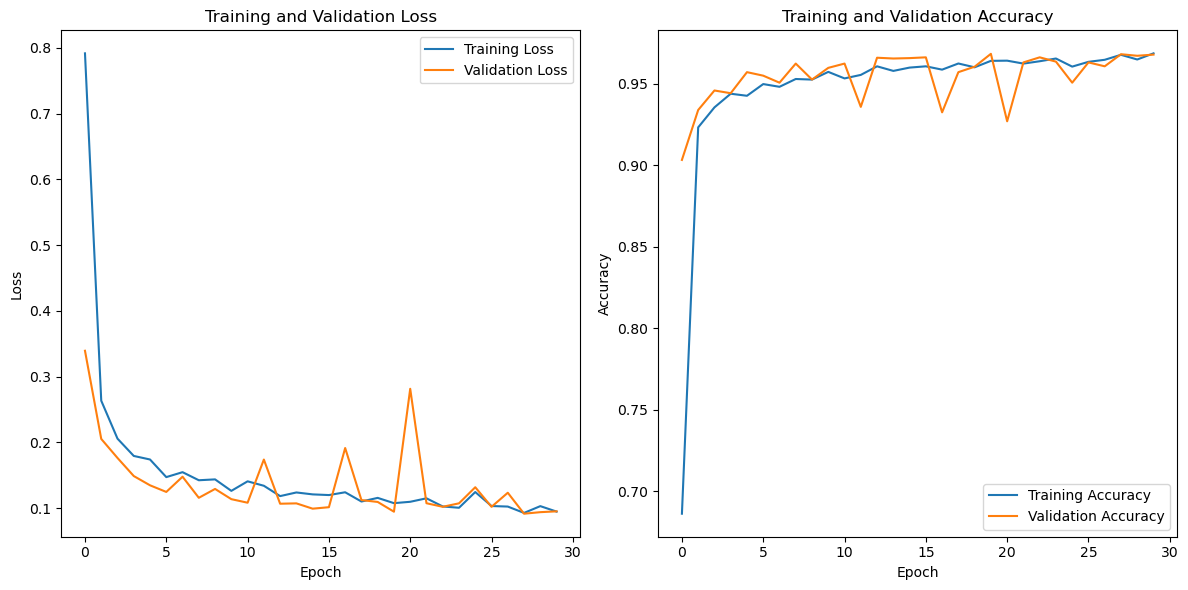

In [15]:
def plot_combined_history(combined_history):
  
    
    # Plot loss
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(combined_history['loss'], label='Training Loss')
    plt.plot(combined_history['val_loss'], label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Training and Validation Loss')
    plt.legend()

    # Plot accuracy
    plt.subplot(1, 2, 2)
    plt.plot(combined_history['accuracy'], label='Training Accuracy')
    plt.plot(combined_history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.legend()

    plt.tight_layout()
    plt.show()
plot_combined_history(history.history)

In [16]:
model.save('CNNLSTM.h5')